Использую каталог: ../outputs/sd3-lora/images
Grid: rows=4 (folders) x cols=4 (files in first folder)
Saved collage to: ../outputs/sd3-lora/images/collage_grid.png


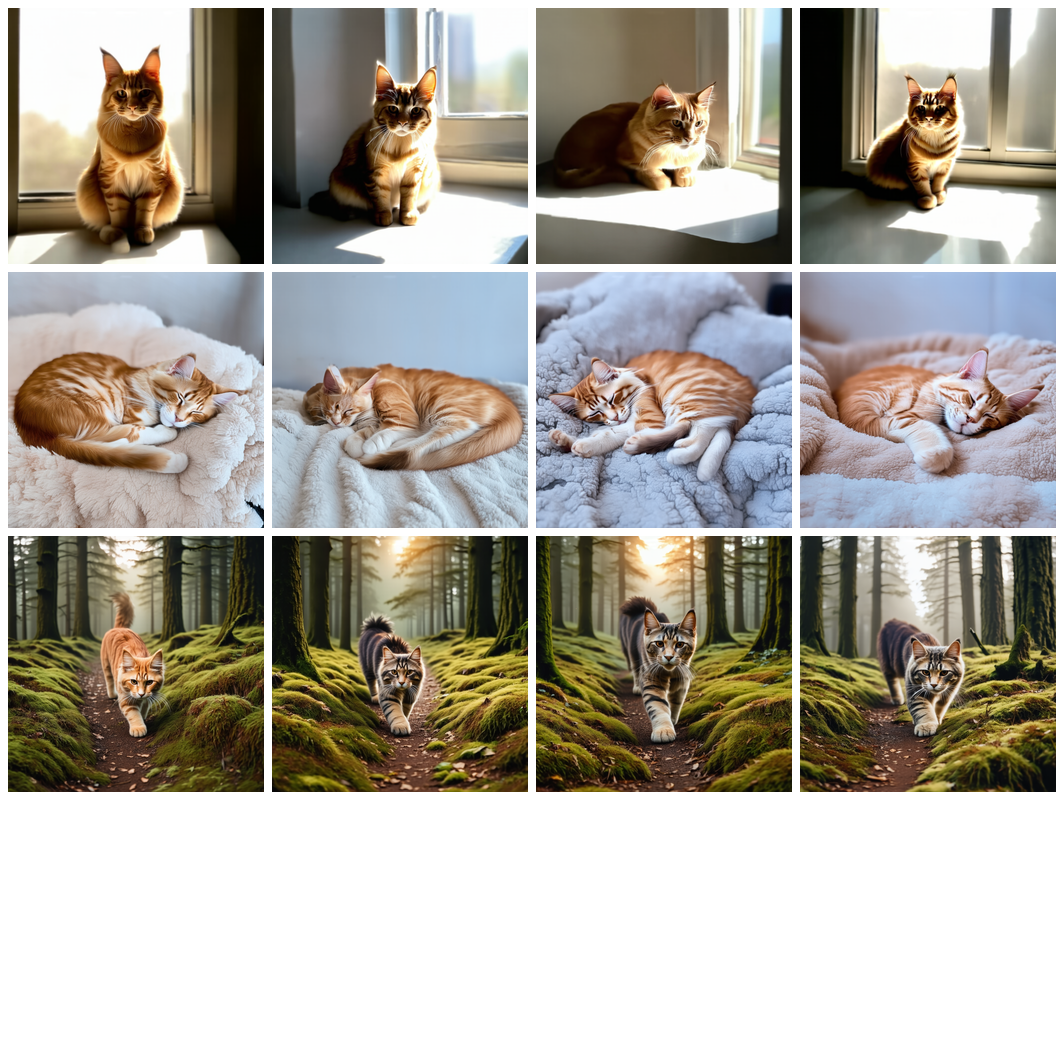

Download path: sandbox:../outputs/sd3-lora/images/collage_grid.png


In [5]:
# Jupyter cell: единый коллаж rows = #folders, cols = #files_in_first_folder
from pathlib import Path
from PIL import Image, ImageFile
from IPython.display import display
import io, math, os

ImageFile.LOAD_TRUNCATED_IMAGES = True

# ------------------ настройка ------------------
# Попробует найти 'sd3-lora-text-inference' автоматически.
# Если авто-поиск не сработает — замените base_dir на абсолютный путь и запустите снова.

base_dir = Path("../outputs/sd3-lora/images")
print("Использую каталог:", base_dir)

# Параметры коллажа
thumb_size = (256, 256)   # размер каждой плитки
pad = 8
bg_color = (255,255,255)
out_path = Path(base_dir, "collage_grid.png")  # куда сохранить итог

# Собираем подпапки и файлы
subfolders = sorted([p for p in base_dir.iterdir() if p.is_dir()])
if not subfolders:
    raise FileNotFoundError(f"Нет подпапок в {base_dir}")

first_imgs = sorted([f for f in subfolders[0].iterdir() if f.suffix.lower() in {".png",".jpg",".jpeg",".webp"}])
cols = max(1, len(first_imgs))
rows = len(subfolders)
print(f"Grid: rows={rows} (folders) x cols={cols} (files in first folder)")

def make_tile(path, size):
    try:
        im = Image.open(path).convert("RGB")
        im.thumbnail(size, Image.LANCZOS)
        tile = Image.new("RGB", size, bg_color)
        x = (size[0]-im.width)//2
        y = (size[1]-im.height)//2
        tile.paste(im, (x,y))
        return tile
    except Exception:
        # placeholder (white)
        return Image.new("RGB", size, bg_color)

tiles = []
for folder in subfolders:
    imgs = sorted([f for f in folder.iterdir() if f.suffix.lower() in {".png",".jpg",".jpeg",".webp"}])
    for i in range(cols):
        if i < len(imgs):
            tiles.append(make_tile(imgs[i], thumb_size))
        else:
            tiles.append(Image.new("RGB", thumb_size, bg_color))

# Создаём коллаж
collage_w = cols * thumb_size[0] + (cols + 1) * pad
collage_h = rows * thumb_size[1] + (rows + 1) * pad
collage = Image.new("RGB", (collage_w, collage_h), bg_color)

for i, tile in enumerate(tiles):
    r = i // cols
    c = i % cols
    x = pad + c * (thumb_size[0] + pad)
    y = pad + r * (thumb_size[1] + pad)
    collage.paste(tile, (x,y))

# Save and display
out_path.parent.mkdir(parents=True, exist_ok=True)
collage.save(out_path, format="PNG")
print("Saved collage to:", out_path)
display(collage.resize((min(collage.width, 1200), int(min(collage.width,1200) * collage.height / collage.width))))

print("Download path:", f"sandbox:{out_path}")
